# 5.1 Gráficos de Linha (Line Charts)
Os gráficos de linha são particularmente úteis para visualizar séries temporais e observar o comportamento de variáveis contánuas ao longo do tempo. Neste exercácio, será analisada a evolução
temporal do número de mortes causadas pela COVID-19 em trêss regiões da Organização Mundial
da Saúde (OMS): Eastern Mediterranean, Americas e Europe.
Após a construção do gráfico, responda:
1. Qual região apresentou maior número de mortes acumuladas? <br>
2. Em que período a curva de mortes começou a crescer significativamente em cada região?<br>
3. Como se comporta a taxa de crescimento das curvas? <br>

4. Produzir um gráfico de linhas com a progressão temporal das mortes por região (usar covid 19 clean complete.csv):<br>
(a) Importar as bibliotecas matplotlib e seaborn. Utilizar o comando %matplotlib inline para visualização direta no notebook; <br>
(b) Agrupar os dados pelas colunas Date e WHO Region, somando os valores de mortes;<br>
(c) Plotar as curvas para as regiões especificadas;<br>
(d) Adicionar tátulo, rótulos de eixos, grade (grid) e legenda (legend);<br>
(e) Realizar a análise conforme as perguntas propostas.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil
from dotenv import load_dotenv

import kagglehub

%matplotlib inline

In [12]:
# Configurações de estilo
plt.style.use('default')
plt.rcParams['figure.figsize'] = [21, 12]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titleweight'] = 'bold'

In [11]:
# Carrega as variáveis do .env
load_dotenv()  

# Acessa as credenciais
KAGGLE_USERNAME = os.getenv("KAGGLE_USERNAME")
KAGGLE_KEY = os.getenv("KAGGLE_KEY")

print(f"Usuário Kaggle: {KAGGLE_USERNAME}") 

Usuário Kaggle: None


In [13]:
# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Path to dataset files: /home/usuario/.cache/kagglehub/datasets/imdevskp/corona-virus-report/versions/166


In [15]:
# 1. Define os caminhos
caminho_cache = os.path.expanduser("~/.cache/kagglehub/datasets/imdevskp/corona-virus-report/versions/166/covid_19_clean_complete.csv")
dir_destino = "./data/raw/covid_19_clean_complete.csv"  # Caminho relativo ao projeto

# 2. Cria o diretório './data/raw' se não existir
os.makedirs(os.path.dirname(dir_destino), exist_ok=True)

# 3. Copia o arquivo do cache para o diretório do projeto
try:
    shutil.copy(caminho_cache, dir_destino)
    print(f"Arquivo salvo em: {os.path.abspath(dir_destino)}")
except FileNotFoundError:
    print("Erro: Arquivo não encontrado no cache. Verifique o caminho.")
except Exception as e:
    print(f"Erro ao copiar: {e}")

# 4. Lê o arquivo CSV com pandas
try:
    df = pd.read_csv(dir_destino)
    print("\nDados carregados com sucesso! Primeiras linhas:\n", df.head())
    
except Exception as e:
    print(f"Erro ao ler o CSV: {e}")

Arquivo salvo em: /home/usuario/NIAS/notebooks/data/raw/covid_19_clean_complete.csv



Dados carregados com sucesso! Primeiras linhas:
   Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [ ]:
df_line = df.loc[(df["WHO Region"] == "Eastern Mediterranean") | (df["WHO Region"] == "Americas") | (df["WHO Region"] == "Europe")]
df_line["Date"] = pd.to_datetime(df["Date"])
df_line.groupby(["WHO Region", "Date"]).head()

/tmp/ipykernel_8636/252013711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_line["Date"] = pd.to_datetime(df["Date"])


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
48828,NaN,Barbados,13.193900,-59.543200,2020-07-27,110,7,94,9,Americas
48833,NaN,Bolivia,-16.290200,-63.588700,2020-07-27,71181,2647,21478,47056,Americas
48900,NaN,Djibouti,11.825100,42.590300,2020-07-27,5059,58,4977,24,Eastern Mediterranean
48903,NaN,Egypt,26.820553,30.802498,2020-07-27,92482,4652,34838,52992,Eastern Mediterranean


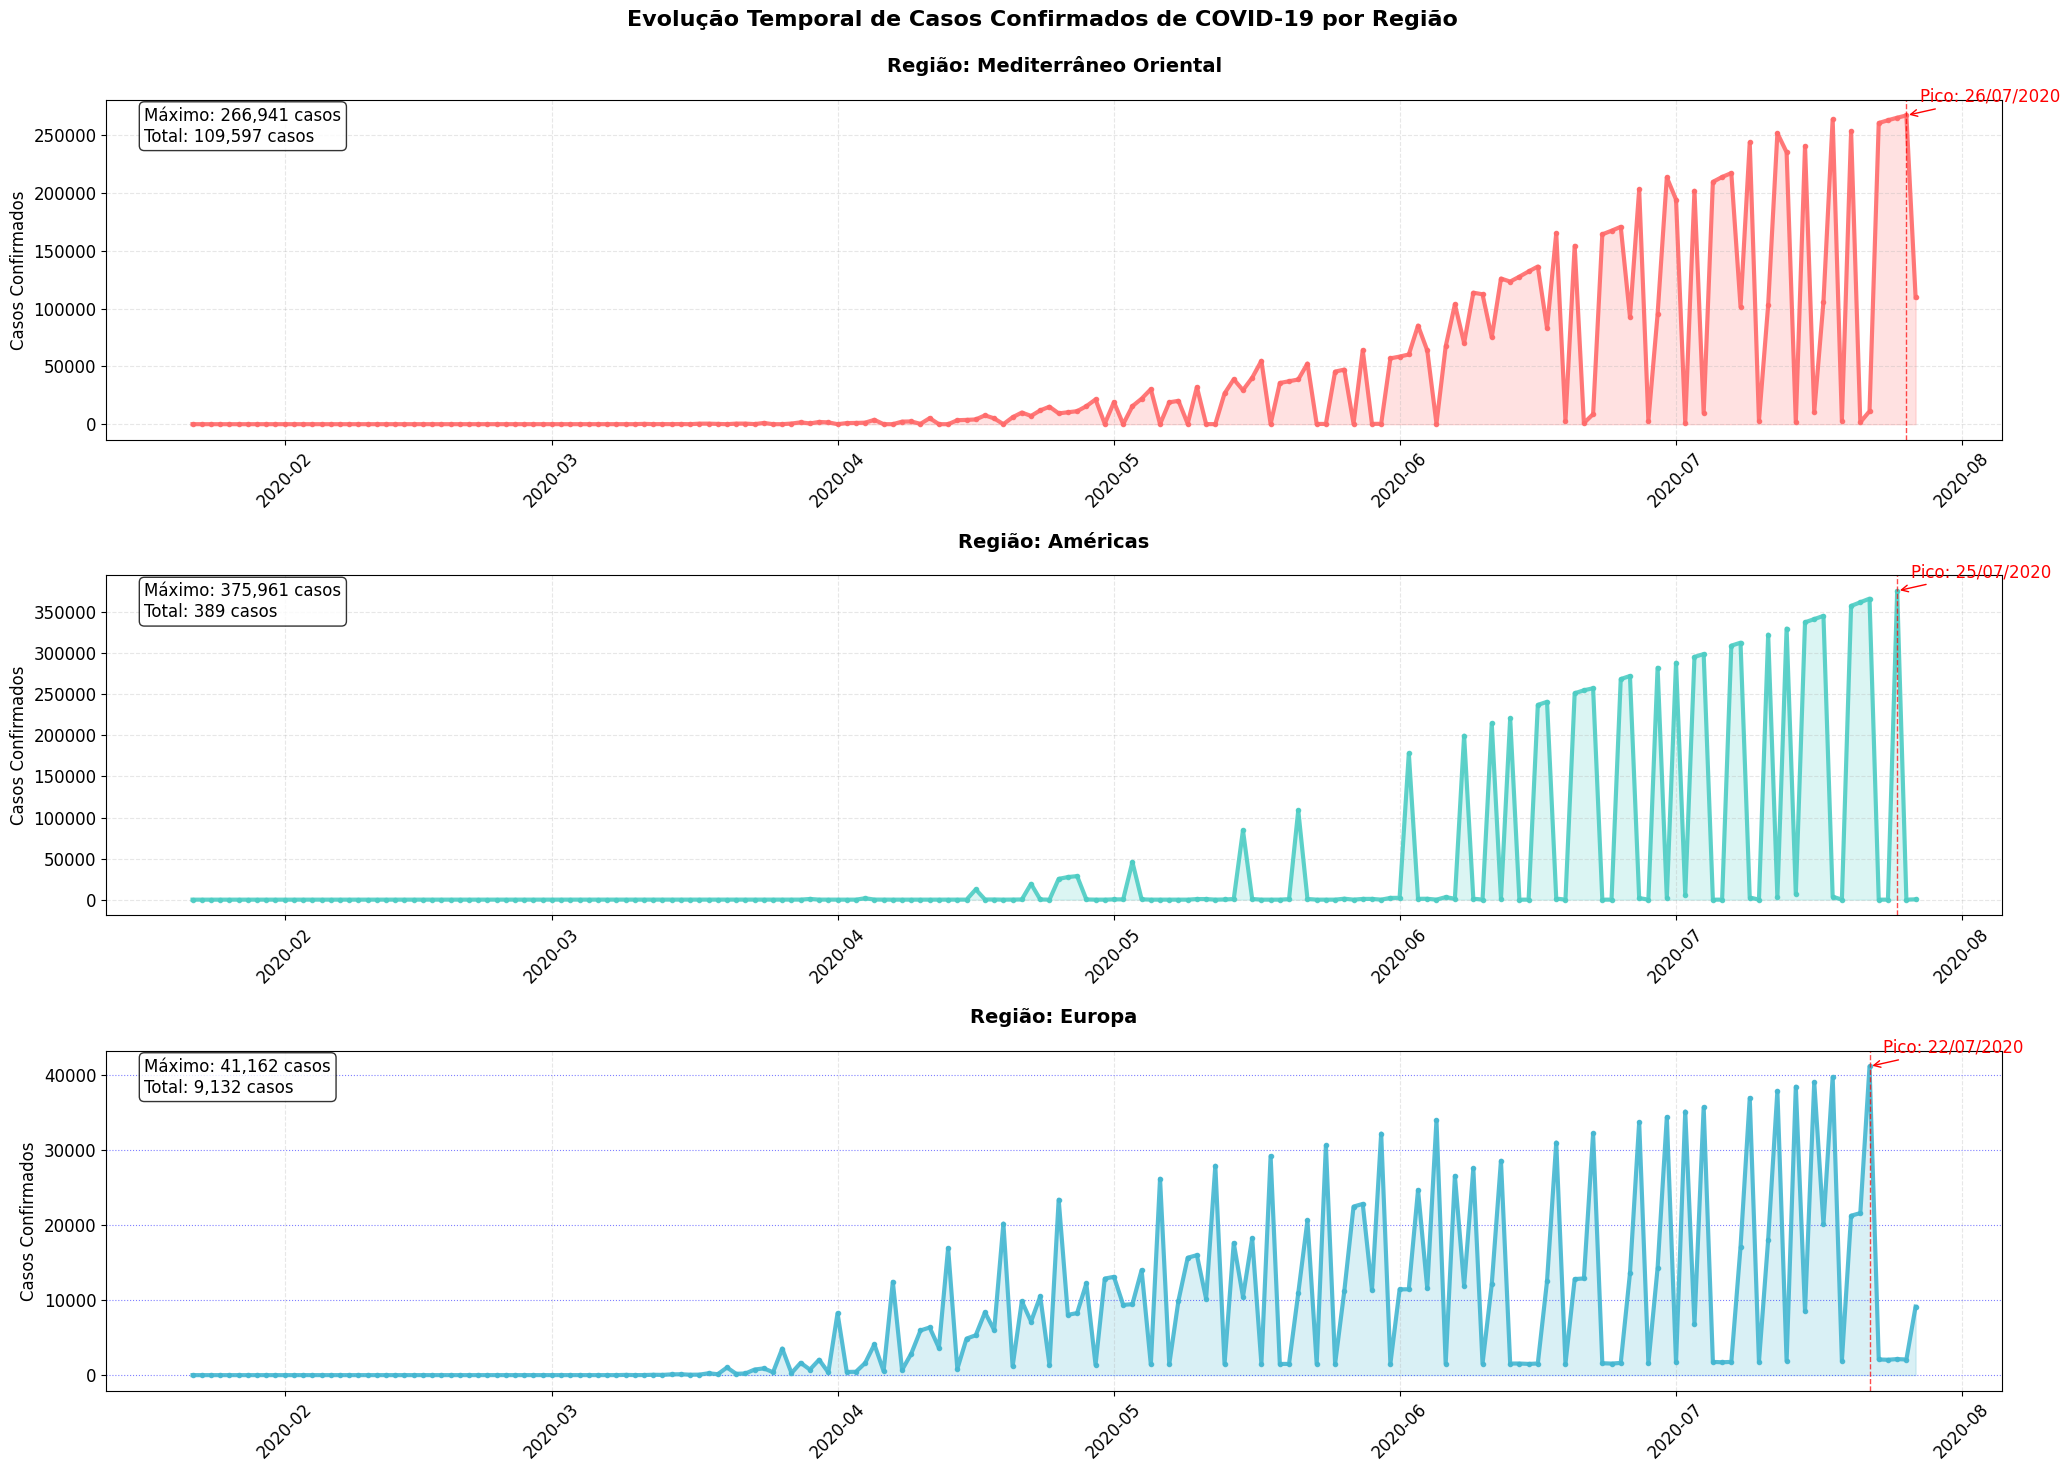

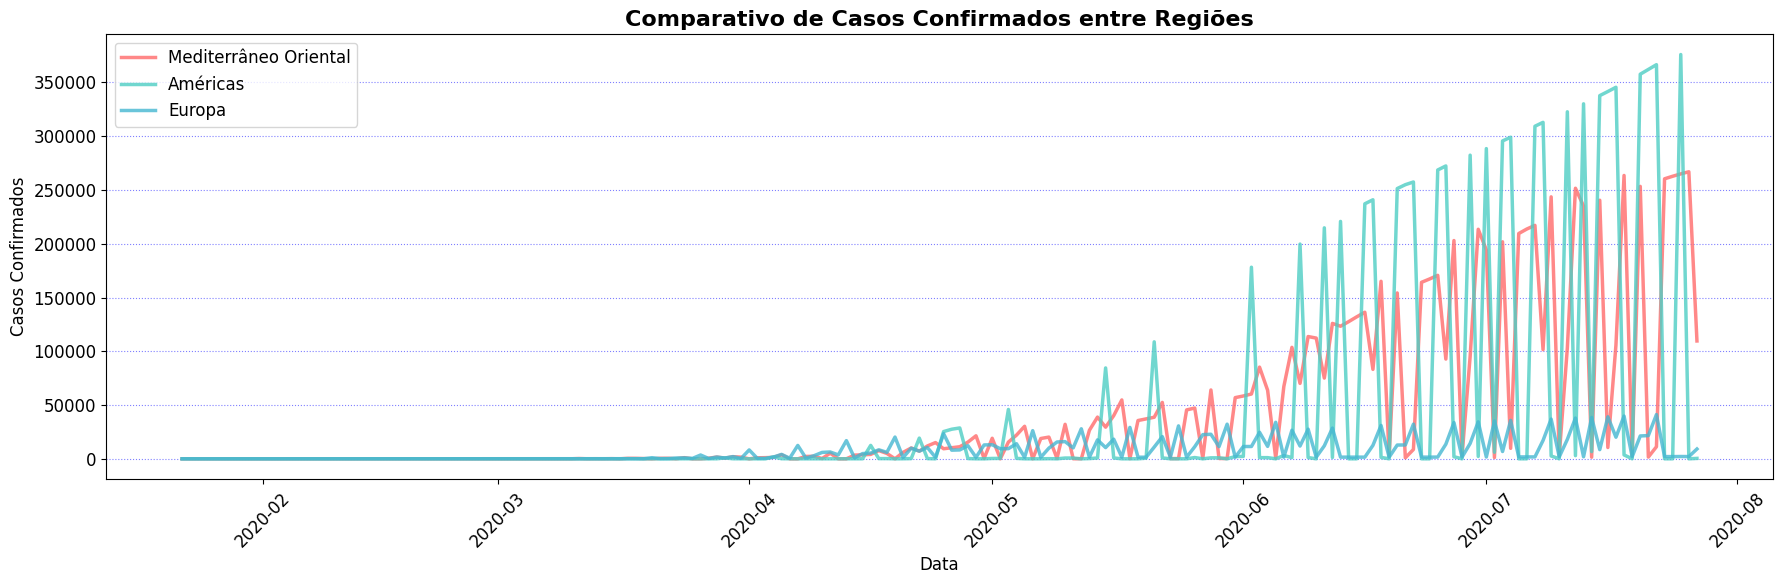

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(21, 15))
fig.suptitle('Evolução Temporal de Casos Confirmados de COVID-19 por Região', 
             fontsize=16, fontweight='bold')

regioes = ["Eastern Mediterranean", "Americas", "Europe"]
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Cores distintas para cada região
nomes_legenda = ['Mediterrâneo Oriental', 'Américas', 'Europa']


for i, regiao in enumerate(regioes):
    
    df_regiao = df_line[df_line["WHO Region"] == regiao].copy()
    df_regiao = df_regiao.sort_values('Date').drop_duplicates('Date')
    ax = axes[i]
    
    ax.plot(df_regiao["Date"], df_regiao["Confirmed"], 
            label=nomes_legenda[i], linewidth=3, color=cores[i], alpha=0.9, marker='o', markersize=3)
    
    ax.fill_between(df_regiao["Date"], df_regiao["Confirmed"], 
                   alpha=0.2, color=cores[i])
    
    ax.set_title(f'Região: {nomes_legenda[i]}', fontsize=14, pad=20)
    ax.set_ylabel('Casos Confirmados', fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.ticklabel_format(style='plain', axis='y')
    
    
    ax.tick_params(axis='x', rotation=45)
    
    max_casos = df_regiao["Confirmed"].max()
    data_max = df_regiao.loc[df_regiao["Confirmed"].idxmax(), "Date"]
    total_casos = df_regiao["Confirmed"].iloc[-1] if len(df_regiao) > 0 else 0
    

    texto_stats = f'Máximo: {max_casos:,.0f} casos\nTotal: {total_casos:,.0f} casos'
    ax.text(0.02, 0.98, texto_stats, transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    

    ax.axvline(x=data_max, color='red', linestyle='--', alpha=0.7, linewidth=1)
    ax.annotate(f'Pico: {data_max.strftime("%d/%m/%Y")}', 
               xy=(data_max, max_casos), xytext=(10, 10), textcoords='offset points',
               arrowprops=dict(arrowstyle='->', color='red'), color='red')


plt.tight_layout()
plt.grid(axis = 'y', ls=":", c='b',  alpha=.5)
plt.subplots_adjust(top=0.92, hspace=0.4)
plt.show()


plt.figure(figsize=(18, 6))
for i, regiao in enumerate(regioes):
    df_regiao = df_line[df_line["WHO Region"] == regiao].copy()
    df_regiao = df_regiao.sort_values('Date').drop_duplicates('Date')
    
    plt.plot(df_regiao["Date"], df_regiao["Confirmed"], 
             label=nomes_legenda[i], linewidth=2.5, color=cores[i], alpha=0.8)

plt.title('Comparativo de Casos Confirmados entre Regiões', fontsize=16, fontweight='bold')
plt.ylabel('Casos Confirmados')
plt.xlabel('Data')
plt.grid(axis = 'y', ls=":", c='b',  alpha=.5)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

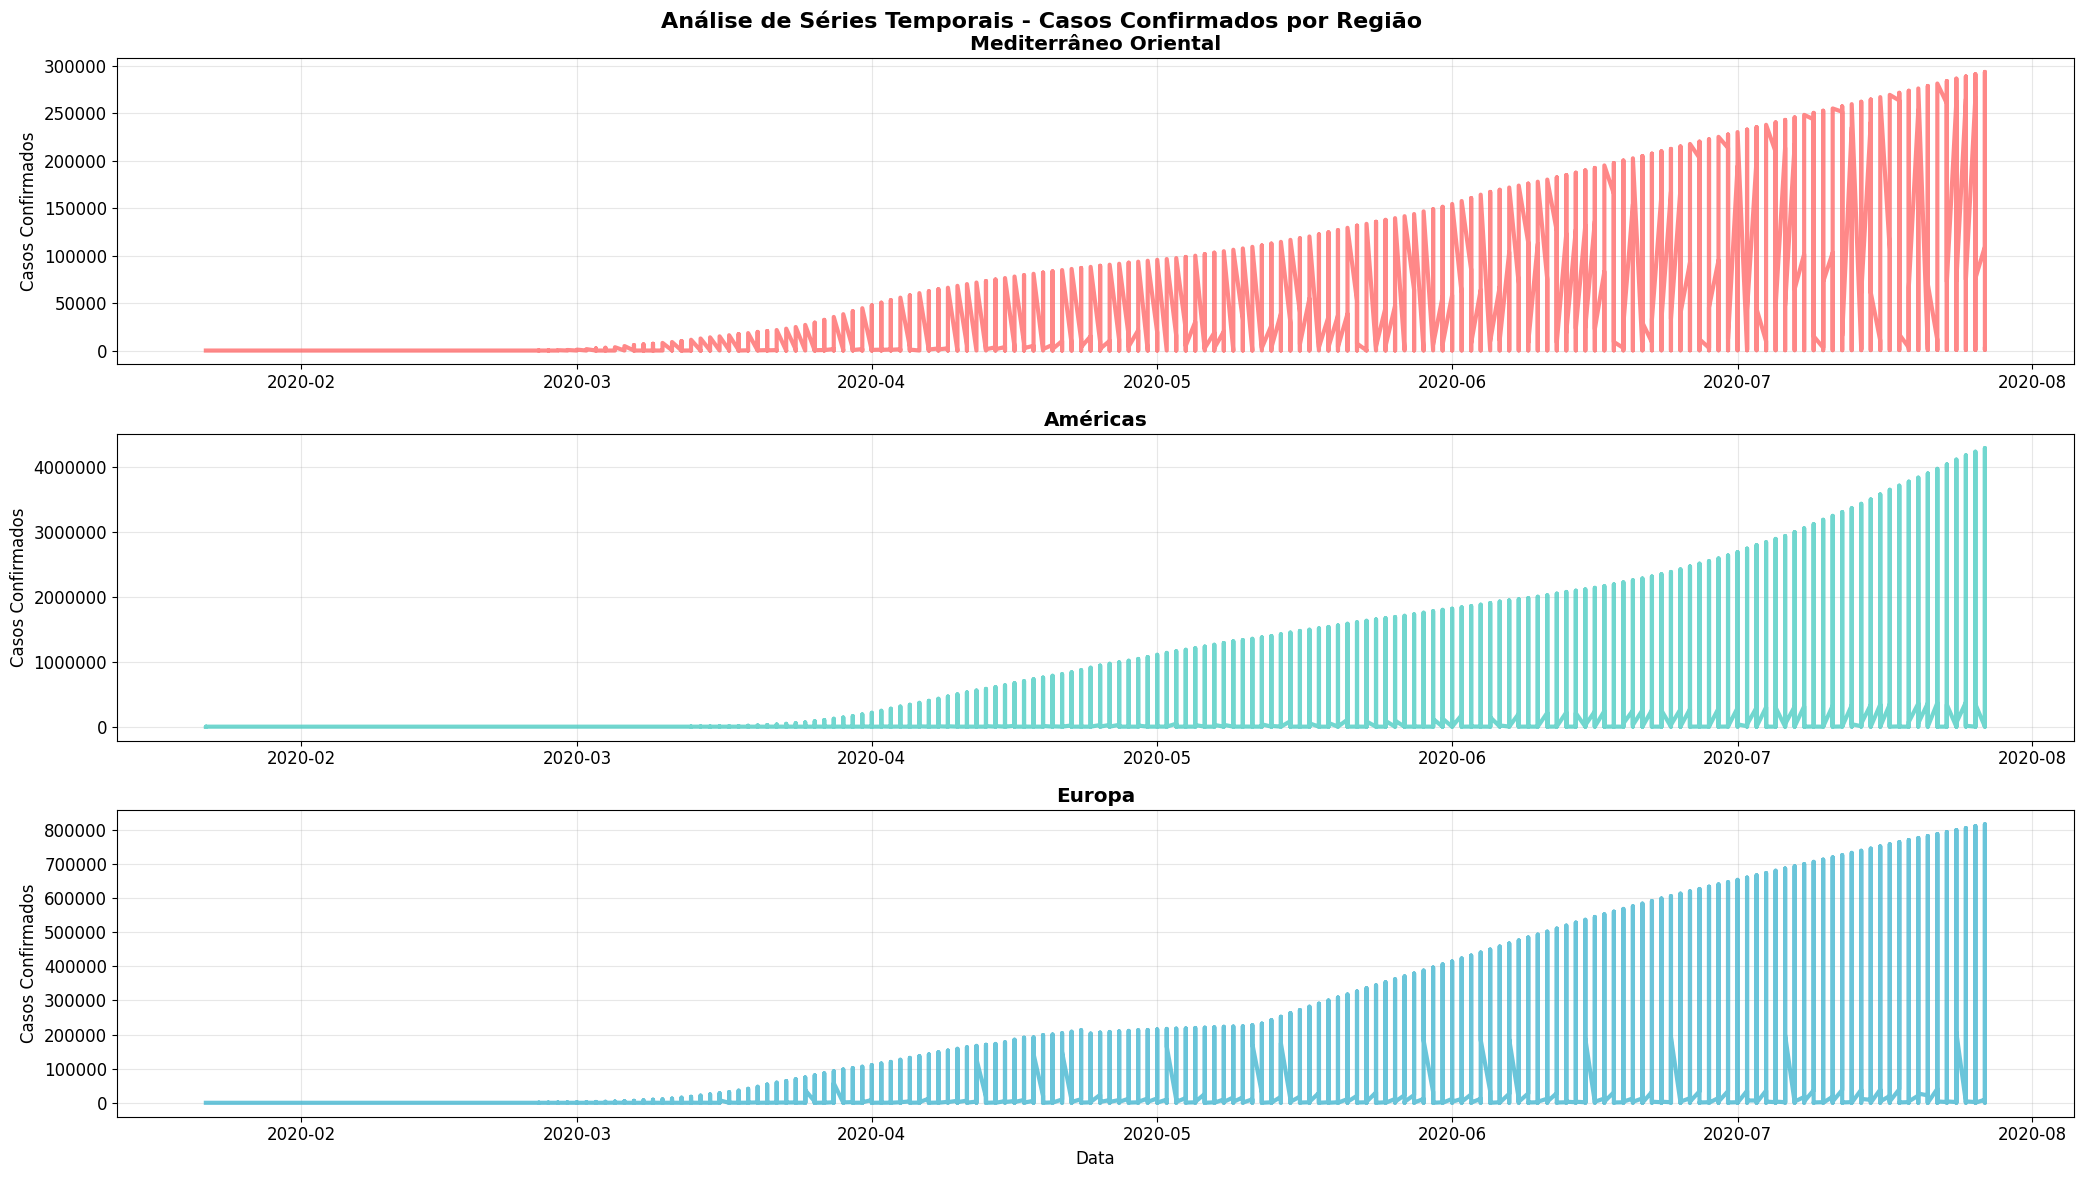

In [ ]:
plt.figure(figsize=(21, 12))
plt.suptitle('Análise de Séries Temporais - Casos Confirmados por Região', 
             fontsize=16, fontweight='bold')

# Eastern Mediterranean
plt.subplot(3, 1, 1)
df_em = df_line[df_line["WHO Region"] == "Eastern Mediterranean"].sort_values('Date')
plt.plot(df_em["Date"], df_em["Confirmed"], label="Eastern Mediterranean", 
         linewidth=3, color='#FF6B6B', alpha=0.8)
plt.ylabel('Casos Confirmados')
plt.title('Mediterrâneo Oriental', fontweight='bold')
plt.grid(axis = 'y', ls=":", c='b',  alpha=.5)
plt.ticklabel_format(style='plain', axis='y')

# Americas
plt.subplot(3, 1, 2)
df_am = df_line[df_line["WHO Region"] == "Americas"].sort_values('Date')
plt.plot(df_am["Date"], df_am["Confirmed"], label="Americas", 
         linewidth=3, color='#4ECDC4', alpha=0.8)
plt.ylabel('Casos Confirmados')
plt.title('Américas', fontweight='bold')
plt.grid(axis = 'y', ls=":", c='b',  alpha=.5)
plt.ticklabel_format(style='plain', axis='y')

# Europe
plt.subplot(3, 1, 3)
df_eu = df_line[df_line["WHO Region"] == "Europe"].sort_values('Date')
plt.plot(df_eu["Date"], df_eu["Confirmed"], label="Europe", 
         linewidth=3, color='#45B7D1', alpha=0.8)
plt.ylabel('Casos Confirmados')
plt.xlabel('Data')
plt.title('Europa', fontweight='bold')
plt.grid(axis = 'y', ls=":", c='b',  alpha=.5)
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()